# 特征工程

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# 切分数据集 tips trick
from sklearn.model_selection import train_test_split

%matplotlib inline

## 水果识别

### 1. 数据加载

In [2]:
# 加载数据集
fruits_df = pd.read_csv('fruit.txt',sep='\t')
fruits_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


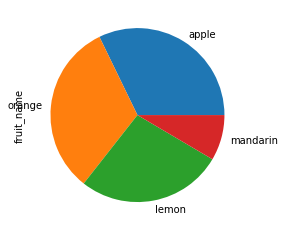

In [3]:
# 产看有多少种不同的水果
fruits_df.fruit_name.unique()
# 用值计数
fruits_df.fruit_name.value_counts().plot(kind='pie')

In [4]:
print('样本个数：', len(fruits_df))

样本个数： 59


In [5]:
# 创建目标标签和名称的字典
fruit_name_dict = dict(zip(fruits_df['fruit_label'], fruits_df['fruit_name']))
print(fruit_name_dict)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [6]:
fruits_df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [7]:
fruits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [8]:
# 产生相同的随机数
np.random.seed(10)
np.random.randint(1,10,5)

array([5, 1, 2, 1, 2])

In [9]:
# 划分数据集
X = fruits_df[['mass', 'width', 'height', 'color_score']]
y = fruits_df['fruit_label']
# 切分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [10]:
print('数据集样本数：{}，训练集样本数：{}，测试集样本数：{}'.format(len(X), len(X_train), len(X_test)))

数据集样本数：59，训练集样本数：44，测试集样本数：15


### 2. 特征归一化

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#
scaler = MinMaxScaler()
# 对于训练集 fit_transform 存疑
X_train_scaled = scaler.fit_transform(X_train)
# 对于测试集 transform
X_test_scaled = scaler.transform(X_test)

for i in range(4):
    print('归一化前，训练数据第{}维特征最大值：{:.3f}，最小值：{:.3f}'.format(i + 1, 
                                           X_train.iloc[:, i].max(), 
                                           X_train.iloc[:, i].min()))
    print('归一化后，训练数据第{}维特征最大值：{:.3f}，最小值：{:.3f}'.format(i + 1, 
                                           X_train_scaled[:, i].max(), 
                                           X_train_scaled[:, i].min()))
    print()

归一化前，训练数据第1维特征最大值：356.000，最小值：76.000
归一化后，训练数据第1维特征最大值：1.000，最小值：0.000

归一化前，训练数据第2维特征最大值：9.200，最小值：5.800
归一化后，训练数据第2维特征最大值：1.000，最小值：0.000

归一化前，训练数据第3维特征最大值：10.500，最小值：4.000
归一化后，训练数据第3维特征最大值：1.000，最小值：0.000

归一化前，训练数据第4维特征最大值：0.920，最小值：0.550
归一化后，训练数据第4维特征最大值：1.000，最小值：0.000



In [12]:
X_train

,mass,width,height,color_score
42,154,7.2,7.2,0.82
48,174,7.3,10.1,0.72
7,76,5.8,4.0,0.81
14,152,7.6,7.3,0.69
32,164,7.2,7.0,0.80
49,132,5.8,8.7,0.73
29,160,7.0,7.4,0.81
37,154,7.3,7.3,0.79
56,116,5.9,8.1,0.73
18,162,7.5,7.1,0.83


In [13]:
label_color_dict = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow'}
color = y_train.map(label_color_dict)
colors = list(map(lambda label: label_color_dict[label], y_train))

<IPython.core.display.Javascript object>


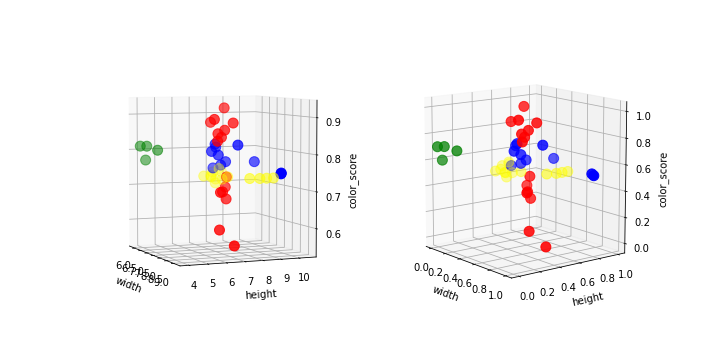

In [15]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=color, marker='o', s=100)
ax1.set_xlabel('width')
ax1.set_ylabel('height')
ax1.set_zlabel('color_score')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_train_scaled[:, 1], X_train_scaled[:, 2], X_train_scaled[:, 3], c=colors, marker='o', s=100)
ax2.set_xlabel('width')
ax2.set_ylabel('height')
ax2.set_zlabel('color_score')

plt.show()

In [16]:
type(color)

pandas.core.series.Series

In [17]:
colors 

['blue',
 'yellow',
 'green',
 'red',
 'blue',
 'yellow',
 'blue',
 'blue',
 'yellow',
 'red',
 'yellow',
 'blue',
 'red',
 'green',
 'blue',
 'red',
 'yellow',
 'red',
 'yellow',
 'red',
 'red',
 'blue',
 'red',
 'yellow',
 'yellow',
 'yellow',
 'blue',
 'red',
 'red',
 'yellow',
 'blue',
 'green',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'yellow',
 'green',
 'red',
 'yellow',
 'yellow',
 'yellow']

### 3. 归一化对结果的影响

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier(n_neighbors=5)
# 在未归一化的数据上进行训练并测试
knn.fit(X_train, y_train)
print('未归一化特征，测试准确率：{:.3f}'.format(knn.score(X_test, y_test)))

# 在归一化的数据上进行训练并测试
knn.fit(X_train_scaled, y_train)
print('归一化特征后，测试准确率：{:.3f}'.format(knn.score(X_test_scaled, y_test)))

未归一化特征，测试准确率：0.533
归一化特征后，测试准确率：1.000


In [19]:
lr = LogisticRegression(multi_class='auto')
lr.fit(X_train, y_train)
print('未归一化特征，测试准确率：{:.3f}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_scaled, y_train)
print('归一化特征后，测试准确率：{:.3f}'.format(lr.score(X_test_scaled, y_test)))

未归一化特征，测试准确率：0.467
归一化特征后，测试准确率：0.467


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
svc = SVC()
svc.fit(X_train, y_train)
print('未归一化特征，测试准确率：{:.3f}'.format(svc.score(X_test, y_test)))
svc.fit(X_train_scaled, y_train)
print('归一化特征后，测试准确率：{:.3f}'.format(svc.score(X_test_scaled, y_test)))

未归一化特征，测试准确率：0.267
归一化特征后，测试准确率：0.800


### 4. 标签编码和独热编码

In [21]:
# 随机生成有序型特征和类别特征作为例子
X_train = np.array([['male', 'low'],
                  ['female', 'low'],
                  ['female', 'middle'],
                  ['male', 'low'],
                  ['female', 'high'],
                  ['male', 'low'],
                  ['female', 'low'],
                  ['female', 'high'],
                  ['male', 'low'],
                  ['male', 'high']])

X_test = np.array([['male', 'low'],
                  ['male', 'low'],
                  ['female', 'middle'],
                  ['female', 'low'],
                  ['female', 'high']])

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #get_dummies

# 在训练集上进行编码操作
label_enc = LabelEncoder() # 首先将male, female用数字编码
one_hot_enc = OneHotEncoder() # 将数字编码转换为独热编码

In [23]:
X_train[:, 0]

array(['male', 'female', 'female', 'male', 'female', 'male', 'female',
       'female', 'male', 'male'], dtype='<U6')

In [24]:
tr_feat1_tmp = label_enc.fit_transform(X_train[:, 0]).reshape(-1, 1) # reshape(-1, 1)保证为一维列向量
tr_feat1_tmp

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]], dtype=int64)

In [25]:
label_enc.fit_transform(X_train[:, 1])

array([1, 1, 2, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [26]:
tr_feat1 = one_hot_enc.fit_transform(X_train[:, 0].reshape(-1,1)) 
tr_feat1

<10x2 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [27]:
print(tr_feat1)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 1)	1.0


In [30]:
tr_feat2 = one_hot_enc.fit_transform(X_train[:, 1].reshape(-1,1))
tr_feat2

<10x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [31]:
print(tr_feat2)

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 0)	1.0


In [32]:
tr_feat2 = tr_feat2.todense()
tr_feat2

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])

In [28]:
tr_feat1 = tr_feat1.todense() #变成稠密矩阵 稀疏矩阵
tr_feat1

matrix([[0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [33]:
X_train_enc = np.hstack((tr_feat1, tr_feat2))
print(X_train_enc)

[[0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0.]]


In [39]:
# 在测试集上进行编码操作

te_feat1_tmp = label_enc.transform(X_test[:, 0]).reshape(-1, 1) # reshape(-1, 1)保证为一维列向量
te_feat1 = one_hot_enc.transform(te_feat1_tmp) 
te_feat1 = te_feat1.todense()

te_feat2 = label_enc.transform(X_test[:, 1]).reshape(-1, 1)

X_test_enc = np.hstack((te_feat1, te_feat2))
print(X_test_enc)

ValueError: y contains previously unseen labels: ['female', 'male']